In [1]:
%pylab inline

import math
import numpy as np

from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


### Microstates

In [2]:
def combinations_len(N, n):
    if (N < n):
        return 0
    return np.math.factorial(N)/(np.math.factorial(N-n)*np.math.factorial(n))

In [3]:
def S(w):
    k = 1.38 #* pow(10, -23)
    return k*np.log(w)

In [4]:
S(combinations_len(20,10))

16.73497201415139

In [5]:
S(combinations_len(20,11))

16.603443966021416

In [12]:
def create_field(ran_pnts=10, 
                 c_x=0.8, 
                 c_y=0.8, 
                 draw_lines=True, 
                 draw_points=True, 
                 draw_guides=False):
    w = 600
    h = 400
    
    # create field
    field = np.ones((h, w))
    
    # dividors
    if(draw_guides):
        field[:,w//2-2:w//2+2] = 0
        field[h//2-2:h//2+2,:] = 0
    
    r1, r2 = [], []
    
    # dim 1
    flag = True
    while (flag):
        r1 = random.random(ran_pnts)*shape(field)[0] # y
        
        k = np.sum([i<h//2 for i in r1])
        if(k >= ran_pnts*c_y):
            flag = False
    
    # dim 2
    flag = True
    while (flag):
        r2 = random.random(ran_pnts)*shape(field)[1] # x
        
        l = np.sum([i<w//2 for i in r2])
        if(l >= ran_pnts*c_x):
            flag = False
    
    if(draw_lines):
        # vertical lines
        field[r1.astype(int),:] = 0.1
        # horizontal lines
        field[:,r2.astype(int)] = 0.1
    
    if(draw_points):
        field[r1.astype(int),r2.astype(int)] = 0
    
    S_x = S(combinations_len(ran_pnts, np.sum([i<w//2 for i in r2])))    
    S_y = S(combinations_len(ran_pnts, np.sum([i<h//2 for i in r1])))
    
    imshow(field, cmap='gray')
    
    return np.column_stack((r1,r2)), field

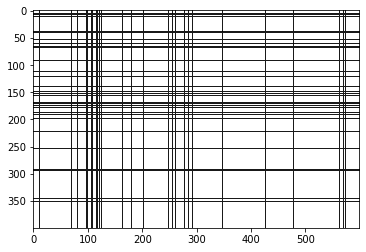

In [13]:
points, _f = create_field(50)

### Kmeans

In [30]:
# create kmeans object
kmeans = KMeans(n_clusters=4)

# fit kmeans object to data
kmeans.fit(points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(points);

[[300.52217124 159.31896773]
 [ 95.72594577 257.93669201]
 [117.22746509  99.82063186]
 [141.78244392 482.43523869]]


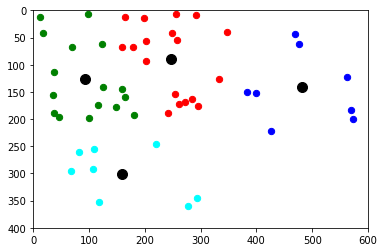

In [31]:
plt.axis([0, 600, 400, 0])
plt.scatter(points[y_km ==0,1], points[y_km == 0,0], s=40, c='red')
plt.scatter(points[y_km ==1,1], points[y_km == 1,0], s=40, c='green')
plt.scatter(points[y_km ==2,1], points[y_km == 2,0], s=40, c='blue')
plt.scatter(points[y_km ==3,1], points[y_km == 3,0], s=40, c='cyan')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=100, c='black')

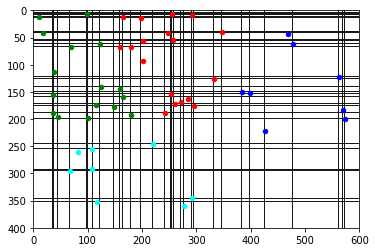

In [48]:
plt.axis([0, 600, 400, 0])
plt.imshow(_f, cmap='gray')
plt.scatter(points[y_km ==0,1], points[y_km == 0,0], s=20, c='red')
plt.scatter(points[y_km ==1,1], points[y_km == 1,0], s=20, c='green')
plt.scatter(points[y_km ==2,1], points[y_km == 2,0], s=20, c='blue')
plt.scatter(points[y_km ==3,1], points[y_km == 3,0], s=20, c='cyan')
# plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=100, c='black')

### Hiearchical clustering

In [33]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

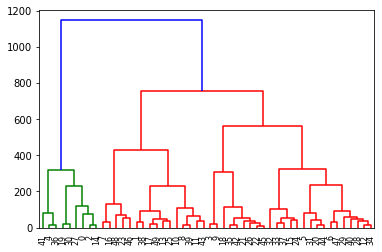

In [46]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

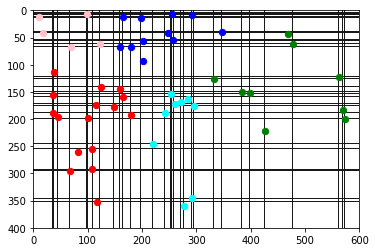

In [47]:
plt.axis([0, 600, 400, 0])
plt.imshow(_f, cmap='gray')
plt.scatter(points[y_hc ==0,1], points[y_hc == 0,0], s=40, c='red')
plt.scatter(points[y_hc==1,1], points[y_hc == 1,0], s=40, c='green')
plt.scatter(points[y_hc ==2,1], points[y_hc == 2,0], s=40, c='blue')
plt.scatter(points[y_hc ==3,1], points[y_hc == 3,0], s=40, c='cyan')

### Hull

In [50]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [244]:
colors = ['red', 'green', 'blue', 'cyan', 'pink']

In [260]:
def createHull(p, drawPoints=False, color='g', drawFigure=False):
    hull = ConvexHull(p)

    plt.axis([0, 600, 400, 0])
    if(drawFigure):
        plt.imshow(_f, cmap='gray')

    if(drawPoints):
        plt.scatter(p[:,1], p[:,0], s=40, c=color)

    plt.plot(p[hull.vertices,1], p[hull.vertices,0], 'black', lw=2)
    plt.plot(p[hull.vertices[::len(hull.vertices)-1],1], p[hull.vertices[::len(hull.vertices)-1],0], 'black')

Hull operations on agglomerative clustering

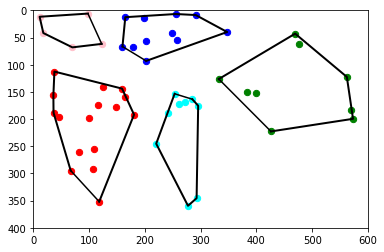

In [261]:
for i in range(5):
    createHull(points[y_hc == i], True, colors[i], drawFigure=False)

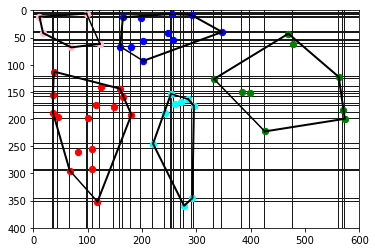

In [265]:
for i in range(5):
    createHull(points[y_hc == i], True, colors[i], drawFigure=True)

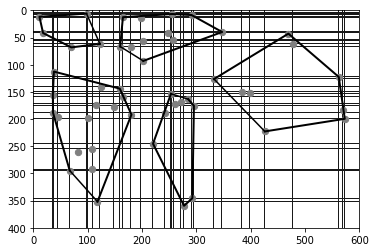

In [267]:
for i in range(5):
    createHull(points[y_hc == i], True, 'gray', drawFigure=True)

Hull operations on k-means clustering

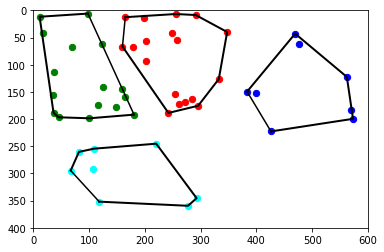

In [264]:
for i in range(4):
    createHull(points[y_km == i], True, colors[i], drawFigure=False)

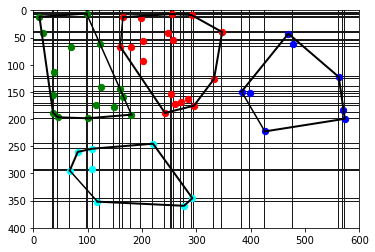

In [268]:
for i in range(4):
    createHull(points[y_km == i], True, colors[i], drawFigure=True)

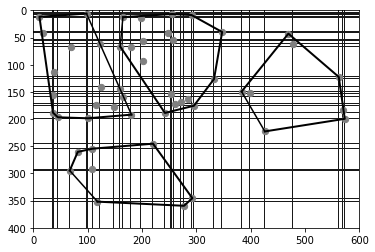

In [269]:
for i in range(4):
    createHull(points[y_km == i], True, 'gray', drawFigure=True)